In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from astropy.cosmology import Planck18
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
params = {
    'output': 'tCl lCl mPk',
    'l_max_scalars': 2000,
    'lensing': 'yes',
    'gauge': 'newtonian',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': Planck18.h,
    'Omega_b': Planck18.Ob0,
    'Omega_cdm': Planck18.Om0 - Planck18.Ob0,
    'k_output_values':"0.001, 0.01, 0.1, 1"}

In [3]:
cosmo = Class()

In [4]:
cosmo.set(params)

True

In [5]:
cosmo.compute()

In [6]:
a_s = [cosmo.get_perturbations()["scalar"][i]["a"] for i in range(4)]
delta_cdm_s = [cosmo.get_perturbations()["scalar"][i]["delta_cdm"] for i in range(4)]
tau_s = [cosmo.get_perturbations()["scalar"][i]['tau [Mpc]'] for i in range(4)]
k_labels = [r"k = 0.001 Mpc$^{-1}$", r"k = 0.01 Mpc$^{-1}$", r"k = 0.1 Mpc$^{-1}$", r"k = 1.0 Mpc$^{-1}$"]
k_s = [0.001, 0.01, 0.1, 1.]

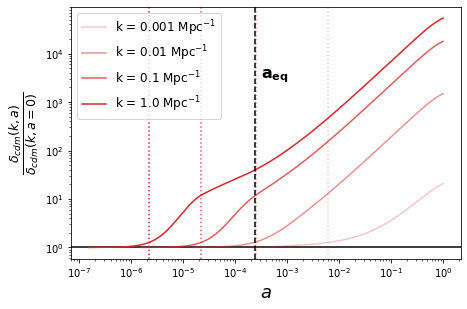

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6.6, 4.4))

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$a$", fontsize=18)
ax.set_ylabel(r"$\frac{\delta_{cdm}(k, a)}{\delta_{cdm}(k, a=0)}$", fontsize=18);
ax.axhline(1., color="k", lw=1.5)

alphas = [0.25, 0.5, 0.75, 1.0]
for a, delta_cdm, tau, k, k_label, alpha in zip(a_s, delta_cdm_s, tau_s, k_s, k_labels, alphas):
    ax.axvline(interp1d(tau, a)(1./k), ls="dotted", lw=1.5, color="tab:red", alpha=alpha)
    ax.plot(a, delta_cdm/delta_cdm[0], lw=1.5, color="tab:red", alpha=alpha, label=k_label)

ax.axvline(interp1d(tau, a)(1./cosmo.k_eq()), ls="dashed", lw=1.5, color="k")
ax.text(np.power(10, -3.5), np.power(10, 3.5), r"$\mathbf{a_{eq}}$", fontsize=16)
ax.legend(fontsize=12)

fig.tight_layout()

plot_dir = "../plots/intro-perturbations/"
fig.savefig(os.path.join(plot_dir, "growth_cdm_modes.pdf"), dpi=600)
fig.savefig(os.path.join(plot_dir, "growth_cdm_modes.png"), dpi=100)

#### Obs.
Por questões de incompatibilidade entre a versão do numpy do ambiente conda usado para a análise e o wrapper classy do CLASS para python, foi necessário criar um ambiente virtualenv específico para este notebook.

In [8]:
!pip freeze

argon2-cffi==20.1.0
astropy==4.2.1
async-generator==1.10
attrs==21.2.0
backcall==0.2.0
bleach==3.3.0
cffi==1.14.5
classy==2.9.4.0
cycler==0.10.0
debugpy==1.3.0
decorator==5.0.9
defusedxml==0.7.1
entrypoints==0.3
importlib-metadata==3.10.1
ipykernel==6.0.1
ipython==7.25.0
ipython-genutils==0.2.0
ipywidgets==7.6.3
jedi==0.18.0
Jinja2==3.0.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.12
jupyter-console==6.4.0
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
kiwisolver==1.3.1
MarkupSafe==2.0.1
matplotlib==3.4.2
matplotlib-inline==0.1.2
mistune==0.8.4
nbclient==0.5.3
nbconvert==6.1.0
nbformat==5.1.3
nest-asyncio==1.5.1
notebook==6.4.0
numpy==1.21.0
packaging==21.0
pandocfilters==1.4.3
parso==0.8.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.3.1
prometheus-client==0.11.0
prompt-toolkit==3.0.19
ptyprocess==0.7.0
pycparser==2.20
pyerfa==2.0.0
Pygments==2.9.0
pyparsing==2.4.7
pyrsistent==0.18.0
python-dateutil==2.8.1
pyzmq==22.1.0
qtconsole==5.1.1
QtPy==1.9.0
s